In [ ]:
!#pip install tensorflow keras matplotlib scikit-learn
!pip install tensorflow



In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/Disease detection'


Mounted at /content/drive


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(base_dir,
                                        target_size=(150, 150),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training')

val_gen = datagen.flow_from_directory(base_dir,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary',
                                      subset='validation')


Found 2973 images belonging to 2 classes.
Found 743 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=train_gen.samples // train_gen.batch_size,
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_gen.batch_size,
                    epochs=11)


Epoch 1/11
92/92 [==============================] - 528s 5s/step - loss: 0.2928 - accuracy: 0.8446 - val_loss: 0.0615 - val_accuracy: 0.9742
Epoch 2/11
92/92 [==============================] - 187s 2s/step - loss: 0.0705 - accuracy: 0.9728 - val_loss: 0.0889 - val_accuracy: 0.9755
Epoch 3/11
92/92 [==============================] - 179s 2s/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0214 - val_accuracy: 0.9959
Epoch 4/11
92/92 [==============================] - 194s 2s/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.1930 - val_accuracy: 0.9701
Epoch 5/11
92/92 [==============================] - 184s 2s/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0617 - val_accuracy: 0.9837
Epoch 6/11
92/92 [==============================] - 185s 2s/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.2085 - val_accuracy: 0.9402
Epoch 7/11
92/92 [==============================] - 191s 2s/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.0324 - val_accuracy: 0.9918
Epoch 8/11
92

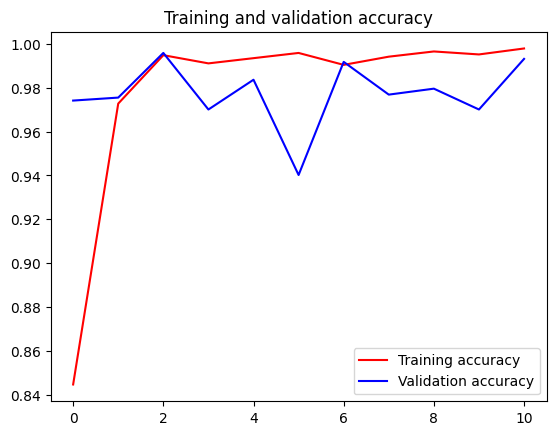

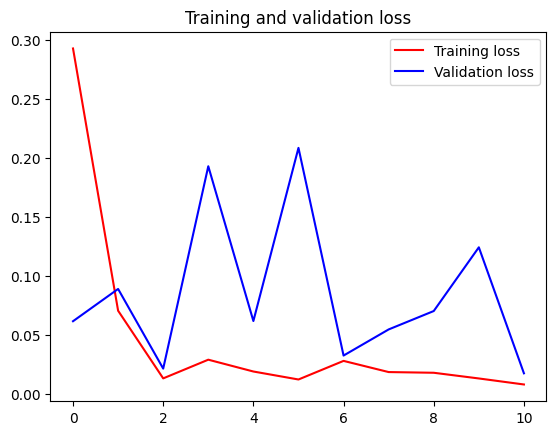

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
loss, accuracy = model.evaluate(val_gen)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


24/24 [==============================] - 14s 591ms/step - loss: 0.0172 - accuracy: 0.9933
Validation accuracy: 99.33%


In [7]:
model.save('my_model.keras')


In [8]:
from keras.models import load_model
model = load_model('my_model.keras')


In [9]:
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return 'Tomato Mosaic Virus' if prediction[0] > 0.5 else 'Healthy'


In [10]:
img_path = '/content/drive/MyDrive/Disease detection/Tomato___healthy/tomato.JPG'
result = predict_image(img_path)
print(f'The plant is: {result}')


1/1 [==============================] - 0s 262ms/step
The plant is: Healthy


In [ ]:
!pip install gunicorn


In [14]:
!pip install flask pyngrok


In [12]:
!ngrok authtoken 2gfblVBkGmmAG2R4mqDQwBIyo6V_oJgQXHrK4yFv8BEFCSUo

/bin/bash: line 1: ngrok: command not found


In [1]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [23]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your pre-trained model
model = load_model('my_model.keras')
class_names = ['Healthy', 'Tomato Mosaic Virus']

# Define a function to preprocess the input image
def preprocess_image(img):
    img = img.resize((150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Define the prediction function
def predict(image):
    img = image.load_img(image, target_size=(150, 150))
    img_array = preprocess_image(img)
    prediction = model.predict(img_array)
    result = class_names[int(np.round(prediction)[0])]
    return result

# Streamlit UI
st.title('Tomato Disease Detection')
uploaded_file = st.file_uploader("Upload an image of a tomato", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    prediction = predict(uploaded_file)
    st.write(f"Prediction: {prediction}")


In [24]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.195.191:8501

  Stopping...
^C
